In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [401]:
df = pd.read_csv('portaventura_cleaned_for_prophet.csv')


In [402]:
df.shape

(1145, 2)

In [403]:
df.head()

,ds,y
0,2018-06-01,46804
1,2018-06-02,57940
2,2018-06-03,44365
3,2018-06-04,37617
4,2018-06-05,32438


In [404]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1145 entries, 0 to 1144
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ds      1145 non-null   object
 1   y       1145 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 18.0+ KB


In [405]:
df['ds'] = pd.to_datetime(df['ds'])

<Axes: >

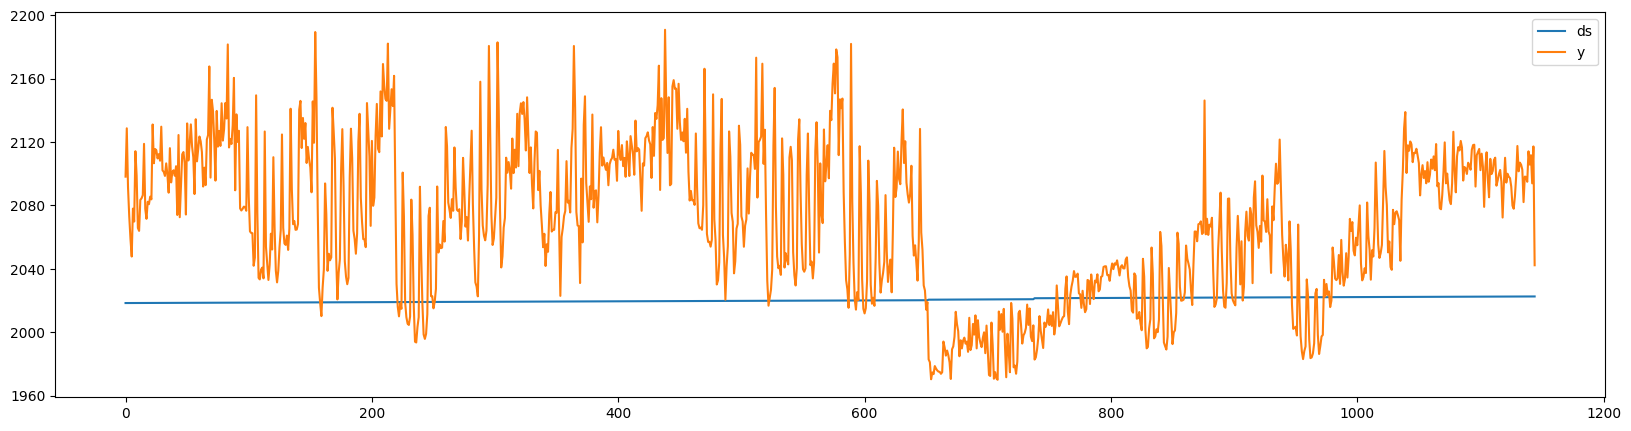

In [431]:
df.plot(figsize = (20,5))

In [407]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['y'])

print("ADF Statistic:", result[0])
print("p-value:", result[1])


ADF Statistic: -3.511076394683776
p-value: 0.007707143974453981


In [408]:
model = Prophet(
    daily_seasonality=False,
    yearly_seasonality=True,
    weekly_seasonality=True,
    changepoint_prior_scale=0.2,
    seasonality_prior_scale=5,
    seasonality_mode='multiplicative'
)


In [409]:
model.add_seasonality(
    name='monthly',
    period=30.5,
    fourier_order=5
)

In [410]:
model.fit(df)

16:53:29 - cmdstanpy - INFO - Chain [1] start processing
16:53:29 - cmdstanpy - INFO - Chain [1] done processing


In [411]:
future = model.make_future_dataframe(periods=90)
forecast = model.predict(future)

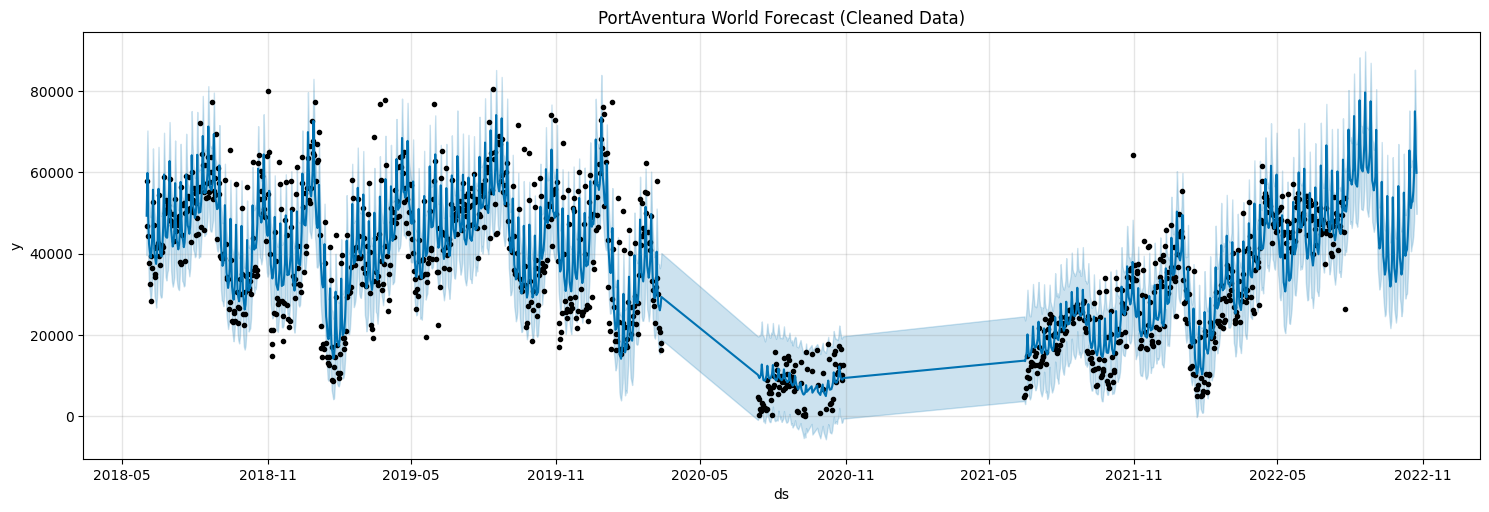

In [416]:
fig1 = model.plot(forecast,figsize = (15,5))
plt.title('PortAventura World Forecast (Cleaned Data)')
plt.show()

In [422]:
df_cv = cross_validation(
    model, 
    initial='720 days', 
    period='60 days', 
    horizon='60 days'
)


  0%|          | 0/9 [00:00<?, ?it/s]

17:00:12 - cmdstanpy - INFO - Chain [1] start processing
17:00:12 - cmdstanpy - INFO - Chain [1] done processing
17:00:12 - cmdstanpy - INFO - Chain [1] start processing
17:00:12 - cmdstanpy - INFO - Chain [1] done processing
17:00:12 - cmdstanpy - INFO - Chain [1] start processing
17:00:12 - cmdstanpy - INFO - Chain [1] done processing
17:00:12 - cmdstanpy - INFO - Chain [1] start processing
17:00:12 - cmdstanpy - INFO - Chain [1] done processing
17:00:12 - cmdstanpy - INFO - Chain [1] start processing
17:00:12 - cmdstanpy - INFO - Chain [1] done processing
17:00:12 - cmdstanpy - INFO - Chain [1] start processing
17:00:13 - cmdstanpy - INFO - Chain [1] done processing
17:00:13 - cmdstanpy - INFO - Chain [1] start processing
17:00:13 - cmdstanpy - INFO - Chain [1] done processing
17:00:13 - cmdstanpy - INFO - Chain [1] start processing
17:00:13 - cmdstanpy - INFO - Chain [1] done processing
17:00:13 - cmdstanpy - INFO - Chain [1] start processing
17:00:13 - cmdstanpy - INFO - Chain [1]

In [426]:
df_p = performance_metrics(df_cv)

print("\nTop 5 Performance Metrics:")
print(df_p.head())


Top 5 Performance Metrics:
  horizon           mse          rmse          mae      mape     mdape  \
0  8 days  8.694224e+07   9324.282047  7657.356744  0.496757  0.342318   
1  9 days  9.497628e+07   9745.577541  7722.465795  0.553093  0.406105   
2 10 days  1.082644e+08  10405.019096  8220.392282  0.535535  0.370416   
3 11 days  1.156253e+08  10752.919826  8578.309130  0.564275  0.370416   
4 12 days  1.508690e+08  12282.872845  9299.639113  8.894852  0.382546   

      smape  coverage  
0  0.451058  0.702624  
1  0.461308  0.663265  
2  0.468756  0.615160  
3  0.487437  0.578231  
4  0.538899  0.591837  


/Users/akash/ProIT/Gen_ai_workspace/ven1/lib/python3.12/site-packages/prophet/plot.py:547: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])
/Users/akash/ProIT/Gen_ai_workspace/ven1/lib/python3.12/site-packages/prophet/plot.py:548: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])


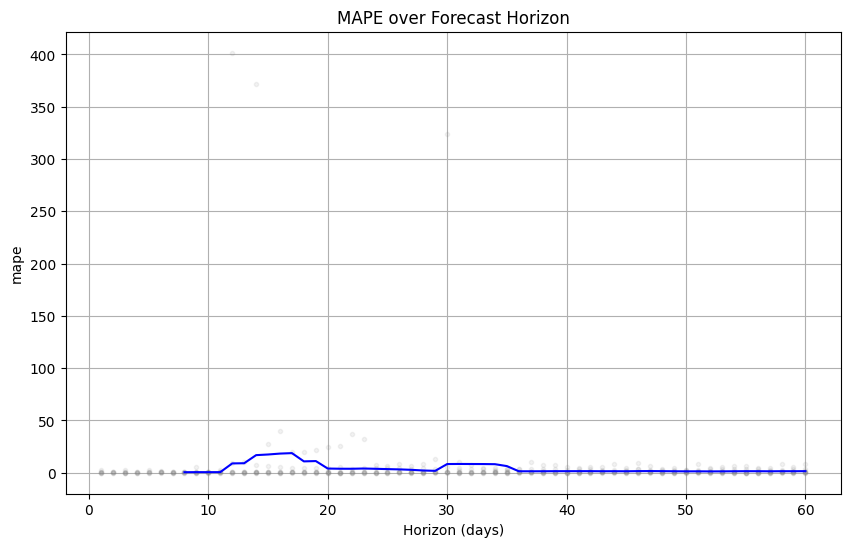

In [430]:
from prophet.plot import plot_cross_validation_metric


fig = plot_cross_validation_metric(df_cv, metric='mape')
plt.title('MAPE over Forecast Horizon')
plt.show()

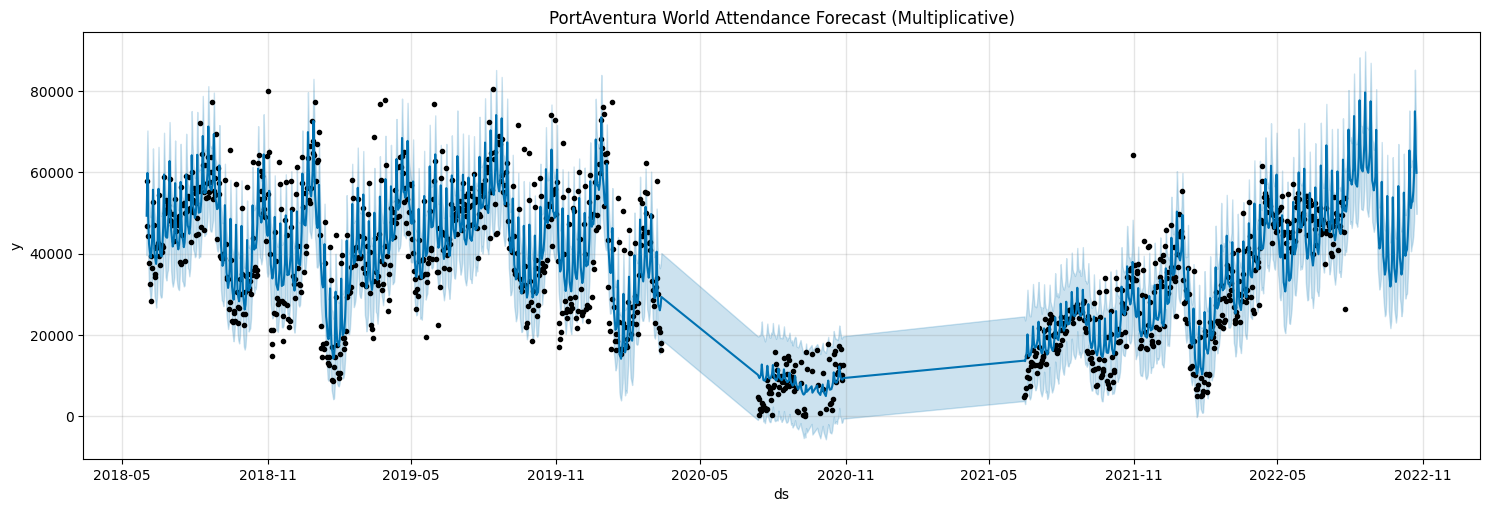

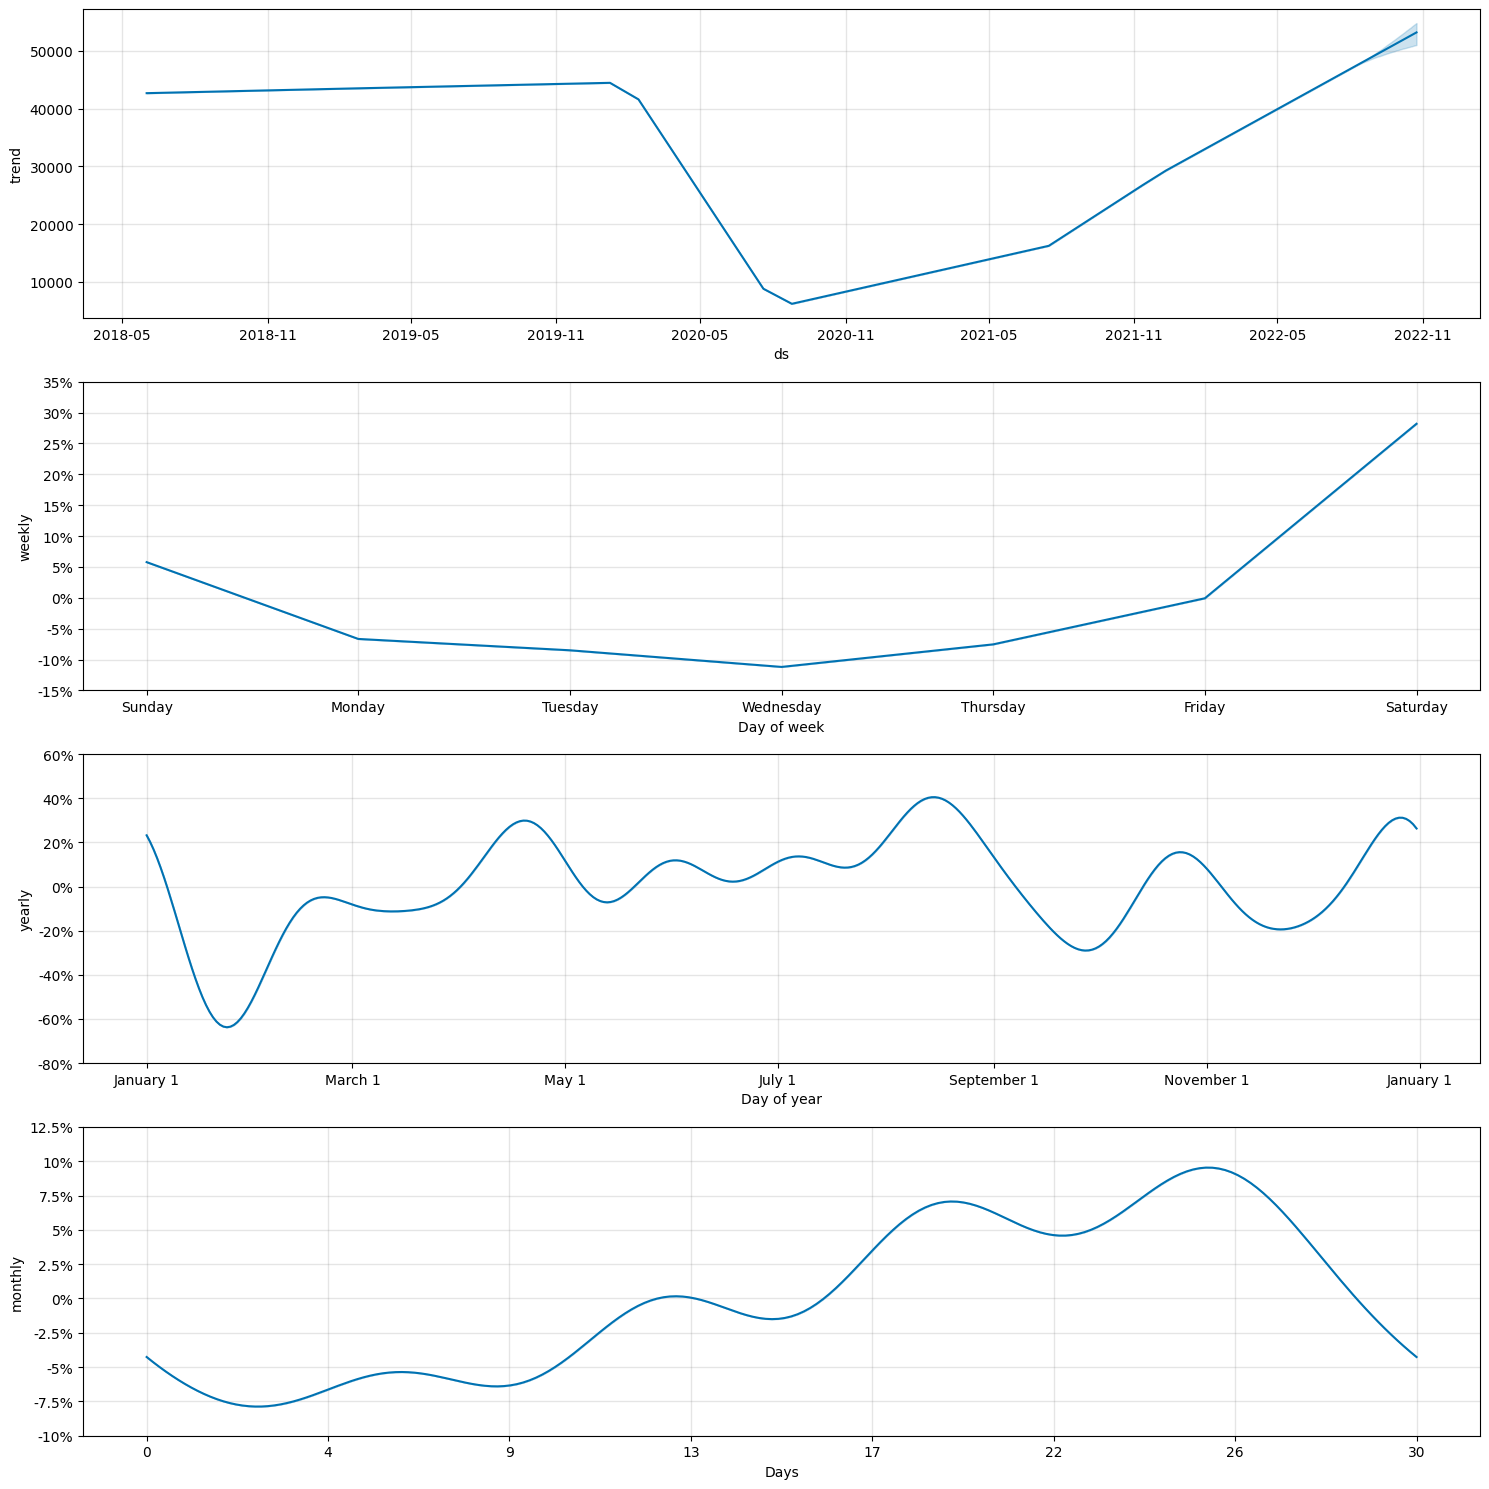

In [421]:
fig1 = model.plot(forecast,figsize = (15,5))
plt.title('PortAventura World Attendance Forecast (Multiplicative)')
plt.show()

fig2 = model.plot_components(forecast,figsize = (15,15))
plt.show()

In [432]:
import joblib

joblib.dump(model, "prophet_attendance_model.pkl")


['prophet_attendance_model.pkl']